# Cat vs Non Cat Exercise

Experimente resolver o problema com um perceptron apenas (regressão logistica), uma rede de camada rasa e uma rede convolucional. Além da demonstração das redes funcionando, um Relatório completo deve ser entregue, contendo informações de Quantos e Quais experimentos foram feitos até chegar no resultado final; Como foi o treinamento; Qual a taxa de acertos da rede; A matriz de confusão, etc...

## Notebook structure

- Import libraries
- Data Preparation
- Data preprocessing


## Importing libraries


In [2]:
import os

import pandas as pd
import numpy as np
import math
import itertools

import h5py

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns

import visualkeras
from PIL import ImageFont


import warnings
warnings.filterwarnings("ignore")


## Data preparation


In [3]:
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './Data/'


In [4]:
filename = 'train_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')


In [5]:
list(f.keys())


['list_classes', 'train_set_x', 'train_set_y']

In [6]:
data_train = list(f['train_set_x'])
data_label = list(f['train_set_y'])


In [7]:
X_tr = np.array(data_train)
y_tr = np.array(data_label)


In [8]:
filename = 'test_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')


In [9]:
list(f.keys())


['list_classes', 'test_set_x', 'test_set_y']

In [10]:
data_test = list(f['test_set_x'])
data_label_test = list(f['test_set_y'])


In [11]:
X_test = np.array(data_test)
y_test = np.array(data_label_test)


## Data visualization


(64, 64, 3)


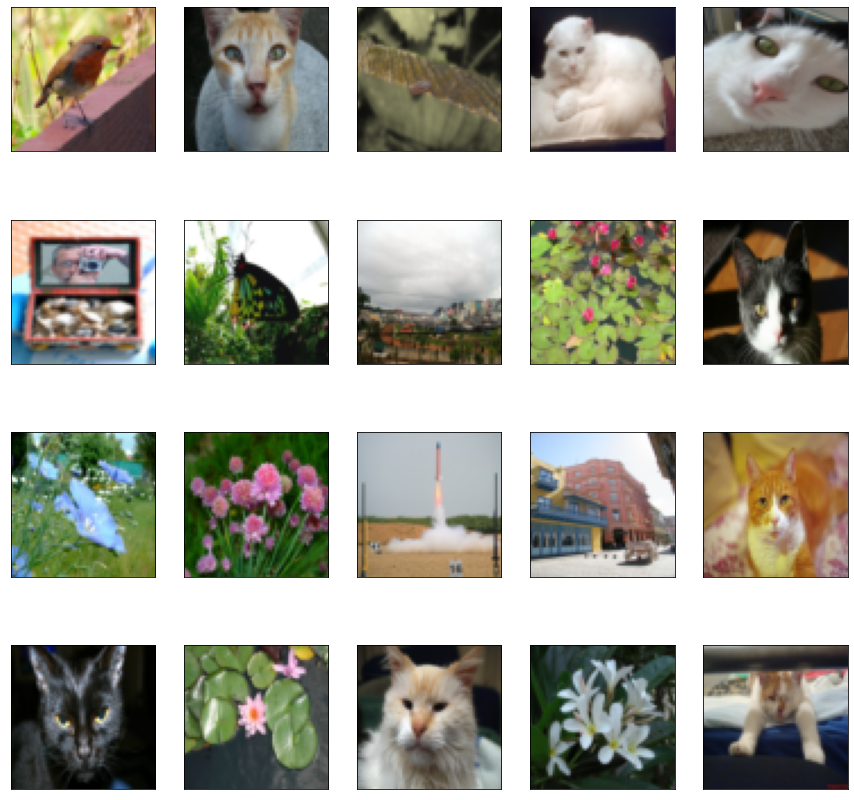

In [12]:
print(data_train[1].shape)
n = 20
plt.figure(figsize=(15, 15))
for i in range(n):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(data_train[i+10])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Checking class balacing


<AxesSubplot:ylabel='count'>

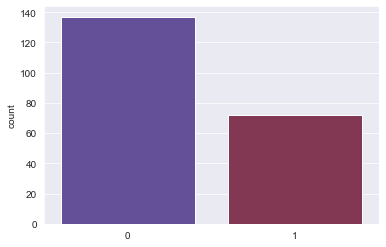

In [13]:
sns.set_style('darkgrid')
sns.countplot(y_tr, palette='twilight')


In [14]:
#
# Calculating class weights
#

from sklearn.utils.class_weight import compute_class_weight

list_y_tr = list(y_tr)
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(list_y_tr), y=list_y_tr)
print("Labels:", np.unique(list_y_tr))
print("Class weights:", class_weights)
d_class_weights = dict(enumerate(class_weights))


Labels: [0 1]
Class weights: [0.76277372 1.45138889]


## Dataset splitting


In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_tr, y_tr, test_size=0.1, stratify=y_tr, random_state=123)
print('Shape of train set feature', X_train.shape)
print('Shape of validation set feature', X_val.shape)
print('Shape of train set label', Y_train.shape)
print('Shape of validation set label', Y_val.shape)

num_classes = 2
input_shape = (64, 64, 3)

Y_train = to_categorical(Y_train, num_classes)
Y_val = to_categorical(Y_val, num_classes)
Y_test = to_categorical(y_test, num_classes)


Shape of train set feature (188, 64, 64, 3)
Shape of validation set feature (21, 64, 64, 3)
Shape of train set label (188,)
Shape of validation set label (21,)


## Experiments with Convolutional Neural Networks


In [16]:

tf.keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="selu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


2022-07-01 23:46:43.559825: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-01 23:46:43.560707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-01 23:46:43.621070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 23:46:43.621262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.392GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-07-01 23:46:43.621288: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-07-01 23:46:43.623177: I tensorflow/stream_executor/platform/

In [17]:
lr = 0.001

# Compile the model.
model.compile(
    optimizer=Adam(learning_rate=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          1

### Visualizing the network architecture

Convolutional layers in yellow
Max Pooling in red
Dense in blue-green


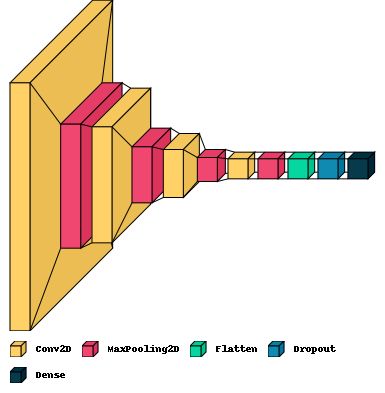

In [18]:
# Visualizing the network
visualkeras.layered_view(model, legend=True)


In [19]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16,
          class_weight=d_class_weights)


2022-07-01 23:46:44.414833: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-01 23:46:44.435758: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/20


2022-07-01 23:46:44.807867: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-07-01 23:46:44.993009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-07-01 23:46:45.472172: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-07-01 23:46:45.520586: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


KeyboardInterrupt: 

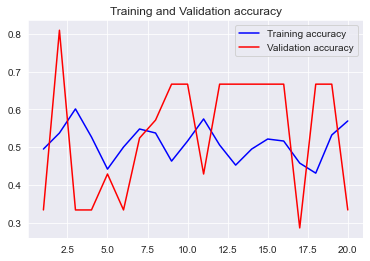

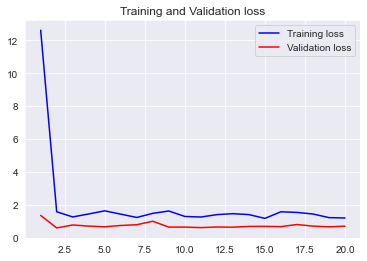

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [ ]:
TrainPredictions = model.predict(X_train)
TrainPredictions = np.argmax(TrainPredictions, axis=1)


Text(0.5, 16.0, 'Predicted label')

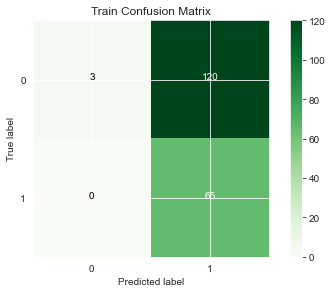

In [ ]:
train_labels = np.argmax(Y_train, axis=1)
conf = confusion_matrix(train_labels, TrainPredictions)

classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Train Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.4f}\n'.format(
    accuracy_score(train_labels, TrainPredictions)))



Accuracy: 0.3617



In [ ]:
TestPredictions = model.predict(X_test)
TestPredictions = np.argmax(TestPredictions, axis=1)


Text(0.5, 16.0, 'Predicted label')

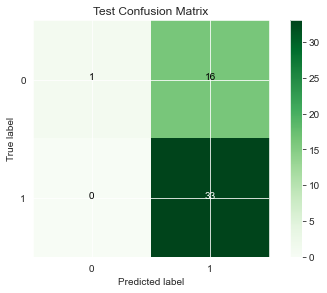

In [ ]:
test_labels = np.argmax(Y_test, axis=1)
conf = confusion_matrix(test_labels, TestPredictions)

classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Test Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [ ]:
print('\nAccuracy: {:.4f}\n'.format(
    accuracy_score(test_labels, TestPredictions)))



Accuracy: 0.6800



In [ ]:
print(X_test[1].shape)
x = np.expand_dims(X_test[1], axis=0)
print(x.shape)
Predictions = model.predict(x)


(64, 64, 3)
(1, 64, 64, 3)


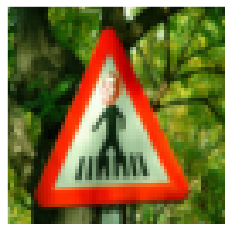

E UM GATO


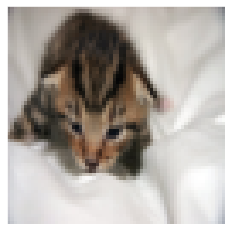

E UM GATO


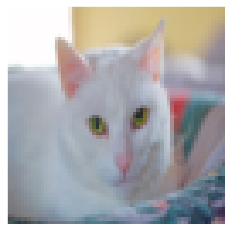

E UM GATO


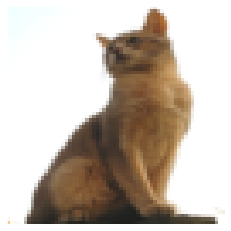

E UM GATO


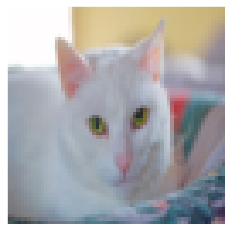

E UM GATO


In [ ]:
import random

n = [random.randint(0, len(data_test)) for i in range(5)]

for i in n:
    #ax = plt.subplot(4, 5, i + 1)
    ax = plt.subplot()
    plt.imshow(data_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

    Predictions = model.predict(np.expand_dims(X_test[i], axis=0))
    Predictions = np.argmax(Predictions, axis=1)
    if Predictions == 0:
        print('NAO E UM GATO')
    else:
        print('E UM GATO')


## Experiments with Logistic Regression


In [ ]:
# Data loading
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './Data/'

filename = 'train_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

list(f.keys())


['list_classes', 'train_set_x', 'train_set_y']

In [ ]:
data_train = list(f['train_set_x'])
data_label = list(f['train_set_y'])


In [ ]:
# Data preprocessing
X_tr = np.array(data_train)
y_tr = np.array(data_label)

#
# Reshaping to flatten
#
X_tr = X_tr.reshape((X_tr.shape[0], -1))
y_tr = y_tr.reshape((y_tr.shape[0], -1))


In [ ]:
y_tr.shape


(209, 1)

In [ ]:
X_tr.shape


(209, 12288)

In [ ]:
filename = 'test_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

data_test = list(f['test_set_x'])
data_label_test = list(f['test_set_y'])

X_test = np.array(data_test)
y_test = np.array(data_label_test)


#
# Reshaping to flatten
#
X_test = X_test.reshape((X_test.shape[0], -1))
y_test = y_test.reshape((y_test.shape[0]))


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Data scaling

scaler = MinMaxScaler()

scaler.fit(X_tr)

X_tr_scaled = scaler.transform(X_tr)
X_test_scaled= scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

class LogisticRegressionIAC():

    def __init__(self, params, input_shape) -> None:
        self.params = params
        self.input_shape = input_shape

    def search_best_hyperparams(self, X_train, y_train, class_weight):

        model = LogisticRegression(
            penalty="l2",
            max_iter=1000,
            n_jobs=-1
        )
        print(model.get_params().keys())

        clf = GridSearchCV(model, params, verbose=0, n_jobs=11)
        clf.fit(X_train, y_train)
        
        print("Best params: ", clf.best_params_)
        print("Best estimator:", clf.best_estimator_)

        return  clf.best_estimator_


    def clear_tf(self):
        tf.keras.backend.clear_session()


In [ ]:
# Model training and search for the best hyperparam

params = {
    "max_iter": [256, 512, 1024],
    "penalty": ["l1", "l2", "none"],
    "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1],
    "solver":["lbfgs", "liblinear"]
}

model = LogisticRegressionIAC(
    input_shape=X_train.shape,
    params=params
)

best_model = model.search_best_hyperparams(X_train=X_tr_scaled, y_train=y_tr, class_weight=d_class_weights)


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


/home/trdp/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/trdp/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/trdp/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/trdp/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

KeyboardInterrupt: 

In [ ]:
#
#
# Make predictions using the best model

y_pred = best_model.predict(X_test_scaled)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        17
           1       0.00      0.00      0.00        33

    accuracy                           0.34        50
   macro avg       0.17      0.50      0.25        50
weighted avg       0.12      0.34      0.17        50



In [ ]:
confusion_matrix(y_test, y_pred)

array([[17,  0],
       [33,  0]])

### Experiments with Simple NN



In [20]:
# Data loading
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './Data/'

filename = 'train_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

list(f.keys())


['list_classes', 'train_set_x', 'train_set_y']

In [21]:
data_train = list(f['train_set_x'])
data_label = list(f['train_set_y'])


In [22]:
# Data preprocessing
X_tr = np.array(data_train)
y_tr = np.array(data_label)

#
# Reshaping to flatten
#
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(X_tr, rgb_weights)

X_tr_new = []

for i in range(X_tr.shape[0]):
    new_img = np.dot(X_tr[i], rgb_weights)
    X_tr_new.append(new_img)

X_tr_new = np.array(X_tr_new)
X_tr_new = X_tr_new.reshape((X_tr_new.shape[0], -1))
y_tr = y_tr.reshape((y_tr.shape[0]))


In [23]:
filename = 'test_catvnoncat.h5'
f = h5py.File(IMAGE_DIRECTORY+filename, 'r')

data_test = list(f['test_set_x'])
data_label_test = list(f['test_set_y'])

X_test = np.array(data_test)
y_test = np.array(data_label_test)


#
# Reshaping to flatten
#
X_test_new = []

for i in range(X_test.shape[0]):
    new_img = np.dot(X_test[i], rgb_weights)
    X_test_new.append(new_img)

X_test_new = np.array(X_test_new)
X_test_new = X_test_new.reshape((X_test_new.shape[0], -1))
y_test = y_test.reshape((y_test.shape[0]))


In [24]:
print("Train shape:", X_tr_new.shape)
print("Test shape:", X_test_new.shape)

Train shape: (209, 4096)
Test shape: (50, 4096)


In [25]:
from sklearn.preprocessing import MinMaxScaler
# Data scaling

scaler = MinMaxScaler()

scaler.fit(X_tr_new)

X_tr_scaled = scaler.transform(X_tr_new)
X_test_scaled= scaler.transform(X_test_new)

In [26]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Adamax,Nadam


def create_model(
        lr=1e-3, 
        hidden_layer_size=256,
        opt="adam",
        dropout=None,
        hidden_activation="relu",
        input_shape=X_train.shape[1]
    ):
    tf.keras.backend.clear_session()

  

    # Building model
    layers = []
    dense=Dense(hidden_layer_size, activation = hidden_activation, input_shape=(input_shape,))

    layers.append(dense)
    if dropout:
        layers.append(Dropout(dropout))

    # Output
    layers.append(Dense(1, activation="sigmoid"))
    model = Sequential(
       layers
    )

    metrics = [
        keras.metrics.FalseNegatives(name="fn"),
        keras.metrics.FalsePositives(name="fp"),
        keras.metrics.TrueNegatives(name="tn"),
        keras.metrics.TruePositives(name="tp"),
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.Accuracy(name="accuracy")
    ]

    optimizers = {
        "adam":Adam(lr),
        "sgd":SGD(lr),
        "rmsprop":RMSprop(lr),
        "adadelta":Adadelta(lr),
        "adagrad":Adagrad(lr),
        "adamax":Adamax(lr),
        "nadam":Nadam(lr)
    }
    model.compile(
        optimizer=optimizers[opt],  loss="binary_crossentropy", metrics=metrics
    )

    return model


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

class NN_IAC():

    def __init__(self, params, input_shape) -> None:
        self.params = params
        self.input_shape = input_shape

    def search_best_hyperparams(self, X_train, y_train, class_weight):

        model = KerasClassifier(
            build_fn=create_model, 
            input_shape=X_train.shape[1], 
            epochs=200, verbose=0, 
            hidden_layer_size=256
        )
        

        clf = GridSearchCV(model, params, verbose=1, n_jobs=1)
        clf.fit(X_train, y_train)
        
        print("Best params: ", clf.best_params_)
        print("Best estimator:", clf.best_estimator_)

        return  clf.best_estimator_


    def clear_tf(self):
        tf.keras.backend.clear_session()


In [37]:
# Model training and search for the best hyperparam

params = {
    "epochs": [128,256],
    "dropout":[None, 0.2, 0.3, 0.5],
    "hidden_layer_size": [128,256,512,1024],
    "opt":["adam", "sgd", "rmsprop", "adadelta", "adagrad", "adamax"],
    "hidden_activation":["relu", "tanh", "sigmoid", "softmax", "selu"]
    
}

model = NN_IAC(
    input_shape=X_tr_new.shape,
    params=params
)

best_model = model.search_best_hyperparams(X_train=X_tr_new, y_train=y_tr, class_weight=d_class_weights)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


In [33]:
#
#
# Make predictions using the best model

y_pred = best_model.predict(X_test_new)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.71      0.53        17
           1       0.77      0.52      0.62        33

    accuracy                           0.58        50
   macro avg       0.60      0.61      0.58        50
weighted avg       0.66      0.58      0.59        50



In [36]:
confusion_matrix(y_test, y_pred)

array([[12,  5],
       [16, 17]])